In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
from pylab import *
from pylab import rcParams
from sklearn.datasets import load_boston,load_breast_cancer
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import random
import time
import os
import timeit
import psutil

## 1 Active data exploration

#### 1. Load the data. It is included in sklearn.datasets and you can nd many copies on the internet too. Make sure you know the coding of all variables. In particular, you should be aware if a variable is categorical or numeric. Explain the coding scheme if it's not obvious.

In [2]:
bos = load_boston()

In [3]:
df = pd.DataFrame(bos.data, columns=bos.feature_names)
df['target'] = bos.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print('Categorical Variables:')
print("CHAS(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)):",df['CHAS'].unique())
print("Unique values in CHAS:",len(df['CHAS'].unique()))

print("RAD(index of accessibility to radial highways)):",df['RAD'].unique())
print("Unique values in RAD:",len(df['RAD'].unique()))

Categorical Variables:
CHAS(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)): [ 0.  1.]
Unique values in CHAS: 2
RAD(index of accessibility to radial highways)): [  1.   2.   3.   5.   4.   8.   6.   7.  24.]
Unique values in RAD: 9


#### 2. Add some (10 or so) engineered features (synthetic features) to the data. As in the previous problem set, you may use various mathematical operations on a single or multiple features to create new ones.

In [6]:
df['B_NEW'] = np.log(df['B'])
df['TAX_NEW'] = np.log(df['TAX'])
df['AGE_NEW'] = np.where(df['AGE']>30,1,0)
df['CB_NEW'] = df['CRIM']*df['B']
df['CT_NEW'] = df['CRIM']*df['TAX']
df['INDUS_NEW'] = df['INDUS']**2
df['RM_NEW'] = df['RM']**2
df['LSTAT_NEW'] = np.where(df['LSTAT']>18,1,0)
df['LL_NEW'] = df['LSTAT']*np.log(df['LSTAT'])
df['PN_NEW'] = df['PTRATIO'] * df['NOX']

#### 3. Add another set (10 or so) bogus features, variables that have no relationship whatsoever to Boston housing market. You may just pick random numbers, or numbers from irrelevant sources, such as population of Chinese cities or baseball scores of yesteryear. Give these features distinct names (such as B1-B10) so you (and the reader) can easily recognize these later. You should have about 35 features in your data now.

In [7]:
d2 = load_breast_cancer()
df1 = pd.DataFrame(d2.data, columns=d2.feature_names)
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
for i in range(10):
    df['B'+str(i+1)]=df1.iloc[0:506,i+2]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813


#### 4. Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the price and each variable. You may add more statistics you consider useful to this table.

In [9]:
df3 = df.describe().T
df3=pd.DataFrame(data=df3,columns=['mean','std'])
df3['Missing values'] = df.isnull().sum()
df3['Range'] = df.max() - df.min()
df3['Correlation'] = df.corr()['target']
df3

,mean,std,Missing values,Range,Correlation
CRIM,3.593761,8.596783,0,88.969880,-0.385832
ZN,11.363636,23.322453,0,100.000000,0.360445
INDUS,11.136779,6.860353,0,27.280000,-0.483725
CHAS,0.069170,0.253994,0,1.000000,0.175260
NOX,0.554695,0.115878,0,0.486000,-0.427321
RM,6.284634,0.702617,0,5.219000,0.695360
AGE,68.574901,28.148861,0,97.100000,-0.376955
DIS,3.795043,2.105710,0,10.996900,0.249929
RAD,9.549407,8.707259,0,23.000000,-0.381626
TAX,408.237154,168.537116,0,524.000000,-0.468536


#### 5. Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the value. Include a few features you consider relevant and a few you consider irrelevant here.

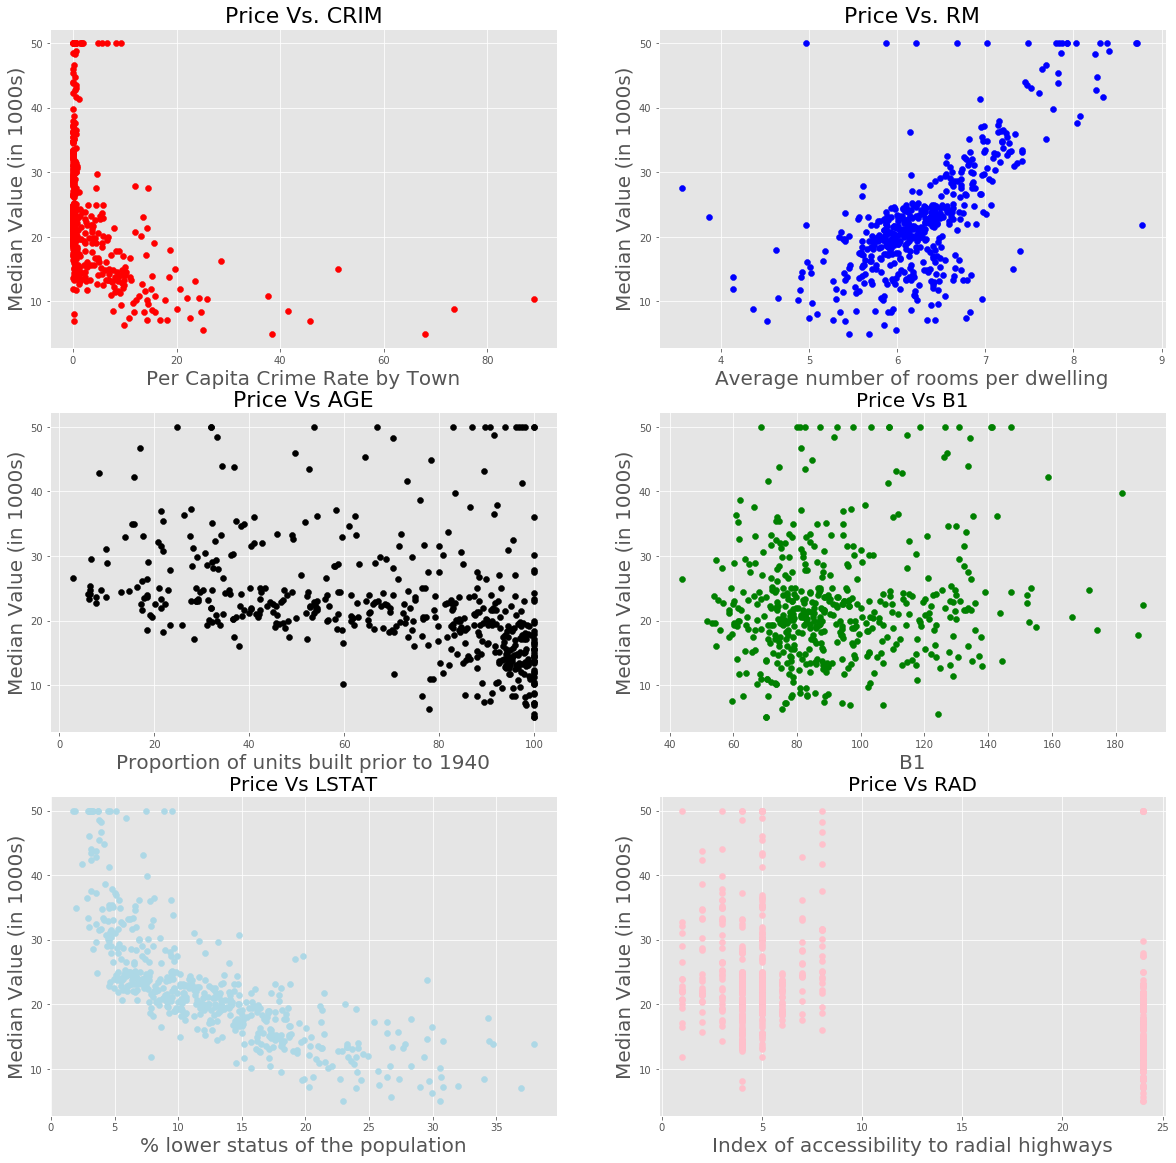

In [10]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = 20, 20
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax1.scatter(df['CRIM'],df['target'], c = 'red')
xlabel('Per Capita Crime Rate by Town', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('Price Vs. CRIM',fontsize=22)


ax2 = fig.add_subplot(322)
ax2.scatter(df['RM'],df['target'], c = 'blue')
xlabel('Average number of rooms per dwelling', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('Price Vs. RM',fontsize=22)

ax3 = fig.add_subplot(323)
ax3.scatter(df['AGE'],df['target'], c = 'black')
xlabel('Proportion of units built prior to 1940', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('\nPrice Vs AGE',fontsize=22)

ax4 = fig.add_subplot(324)
ax4.scatter(df['B1'],df['target'], c = 'green')
xlabel('B1', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('Price Vs B1',fontsize=20)

ax4 = fig.add_subplot(325)
ax4.scatter(df['LSTAT'],df['target'], c = 'lightblue')
xlabel('% lower status of the population', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('Price Vs LSTAT',fontsize=20)

ax4 = fig.add_subplot(326)
ax4.scatter(df['RAD'],df['target'], c = 'pink')
xlabel('Index of accessibility to radial highways', fontsize=20)
ylabel('Median Value (in 1000s)', fontsize=20)
title('Price Vs RAD',fontsize=20)

plt.show()

#### Based on the above plots, we observe the following:
* Median value of owner occupied homes reduced exponentially as we move from less percentage of lower status population region to higher percentage of lower status population. 
* With increase in accessibility to radial highways, we see more number of numbers falling into the lesser median value region.
* We see a certain rise in the median values of the owner occupied houses with increase in the average number of rooms per dwellings.
* With increase in proportion of units built prior to 1940, the median value of the owner occupied houses decreases.
* We find no correlation between the randonly created feature B1 and the target varibale (Median value of the owner occupied houses)
* We observe very small per capita crime rates for most of the houses however, there are few houses who have higher per capita crime rate and their median values for houses is low.

## 2 Warm-up: a few simple models

#### 1. Write this function. The function should take three inputs: a) the estimated model (or just the estimated parameters beta); b) the test data X; and the test labels y. You may add other inputs if you consider it useful, for instance controls for print verbosity.

In [11]:
def loss_function(mod,X_test,y_test):
    coeff = mod.coef_
    intercept = mod.intercept_
    t = len(coeff)
    coeff = coeff.reshape(t,1)
    
    coeff = np.append(np.matrix([intercept]),coeff, axis=0)
    X_test = np.append(np.ones((len(X_test),1)),X_test,axis=1)
    
    N = len(y_test)
    #print(y_test)
    #print(X_test)
    #print(N)
    y_test = y_test.reshape(N,1)
    A = y_test - (X_test @ coeff)
    
    #print(A)
    lf = (1/N) * ((A.T) @ A)
    
    #print(lf)
    return (lf)

### 2.2 A few simple regressions

#### 1. Create a small model. It should include 1-2 variables you consider relevant, i.e. features you think should be closely related to price.

In [12]:
df_new = pd.DataFrame(data=df, columns=['RM','LSTAT'])
y = df['target']
mod = LinearRegression() 

#### 2. 10-fold cross-validate this model to get the average MSE score (the value of your loss function).

In [13]:
k = 10
indices = np.arange(len(df))
np.random.shuffle(indices)
np.random.seed(0)

In [14]:
def mse_cv(df,y,k=10):
    mse = np.empty(k)
    for i in range(k):
        itest = indices[i::k]
        itrain = list(set(indices).difference(itest))
        X_testDat = df.iloc[itest]
        X_trainDat = df.iloc[itrain]
        y_train =  y.iloc[itrain]
        y_test =  y.iloc[itest]
        
        m1 = LinearRegression().fit(X_trainDat,y_train)
        
        mse[i] = loss_function(m1,X_testDat.as_matrix(),y_test.as_matrix())
    
    return (np.mean(mse))

In [15]:
l=[]
l.append(mse_cv(df_new,y))
print("Mean Squared Error with 2 feature model:",mse_cv(df_new,y))

Mean Squared Error with 2 feature model: 31.1533162139


#### 3. Now build the next model with 10 features. Add more features you consider relevant but also those you consider irrelevant. Compute 10-fold MSE for this model.

In [16]:
df_new1 = pd.DataFrame(data=df, columns=['RM','LSTAT','INDUS','NOX','TAX','B1','B2','B3','B4','B5'])
y = df['target']

In [17]:
l.append(mse_cv(df_new1,y))
print("Mean Squared Error with 10 features model:",mse_cv(df_new1,y))

Mean Squared Error with 10 features model: 30.4695029733


#### 4. Finally, include all your features and compute MSE. We call this the full model below.

In [18]:
l.append(mse_cv(df.drop(['target'],axis=1),df['target']))
num = [] # To keep the Count of features for each model
msev = [] # to keep the mse scores for each model
msev.append(mse_cv(df.drop(['target'],axis=1),df['target']))
num.append(33)
print("Mean Squared Error with all features model:",mse_cv(df.drop(['target'],axis=1),df['target']))

Mean Squared Error with all features model: 17.3377317441


#### 5. Compare the results. Which has the best performance?

[31.153316213927418, 30.469502973319514, 17.337731744116564]


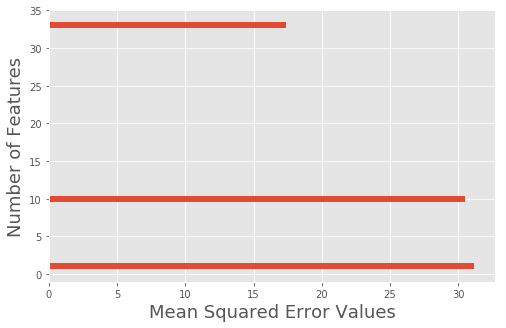

In [19]:
print(l)
c = [1,10,33]
d = pd.DataFrame({'N':c,'MSE':l})
plt.figure(figsize=(8,5))
plt.barh(d['N'],d['MSE'])
plt.ylabel('Number of Features',fontsize=18)
plt.xlabel('Mean Squared Error Values',fontsize=18)
plt.show()

Based on the above Mean Squared Error values, we observed that model with all the features have the least mean squared error value and hence performs better as compared to the other two.

## 3 Find the best model
### 3.1 Can we evaluate all models?

#### 1. How many different linear regression models can you build based on the features you have (including the ones you generated)?

In [20]:
print("Number of models with best subset selection method:",2 ** 33)

Number of models with best subset selection method: 8589934592


#### 2. Run a test: run the following loop a number of times so that the total execution time is reasonably long (at least 5 seconds) but not too long.
* (a) choose a random number of different features
* (b) estimate the model based on these features
* (c) run 10-fold CV to get the MSE score for this model.

In [21]:
df4 = df.drop(['target'],axis=1)
a = []
import sys

start = time.time()
for i in range(100):
    n = random.randint(1,30)
    df5 = df4.sample(n,axis=1,replace=False)
    a.append(mse_cv(df5,df['target']))
end = time.time()

exect = end-start
b = sys.getsizeof(sum(a)/len(a))
print("Average Memory size for 1 MSE value:",sys.getsizeof(sum(a)/len(a)))  
print("Execution time:",end - start)

Average Memory size for 1 MSE value: 32
Execution time: 3.0333893299102783


#### 3. Based on the test timings, calculate how long time it would take to evaluate all the possible models. Would it be possible to store all the resulting MSE-s in your computer's memory?

In [22]:
print("Execution time for all possible models(approx):",int((exect * (2**33))/(3600*24*365)),'years')
print("Average memory size for MSEs for all possible models(approx):",int((b * (2**33))/1073741824),'GB')

Execution time for all possible models(approx): 826 years
Average memory size for MSEs for all possible models(approx): 256 GB


It would take approx 1822 years to evaluate all posisble models and 256 GB memory space for storing all the MSE values from these models. The average MSE value is calculated the avearge memory space required to store an MSE value and hence may vary if we have large or smaller numbers as MSE values.

## 3.2 Forward selection

#### 2. Create a series of 1-feature models and pick the best one by 10-fold CV. Note: always include the constant.
#### 3. Pick the feature with the lowest loss. This is your 1-feature model.
#### 4. Repeat the procedure with more features until all features are included.
#### 5. Pick the best model using Cp, AIC, BIC or adjusted R2 (consult James et al. (2015, section 6.1.3)). This is your forward-selection model.

In [23]:
df6 = df.drop(['target'],axis=1)
c=[]
a = []
h=[]
g=[]

for i in range(0,33):
    df7 = pd.DataFrame(data = df6.iloc[:,i])
    c.append(df7.columns.values[0])
    a.append(mse_cv(df7,df['target']))
    
    d = pd.DataFrame({'feature':c,'MSE':a})
    df9 = df6.drop(d.loc[d['MSE'].idxmin()][1],axis=1)
    df8 = df[d.loc[d['MSE'].idxmin()][1]]

#print(d.loc[d['MSE'].idxmin()][1],d.loc[d['MSE'].idxmin()][0])
h.append(d.loc[d['MSE'].idxmin()][1])
g.append(d.loc[d['MSE'].idxmin()][0])
for i in range(0,32):
    c=[]
    a=[]
    for j in range(0,(df9.shape[1])):
        df11 = pd.concat([df8,df9.iloc[:,j]],axis=1)
        c.append(df11.columns.values)
        a.append(mse_cv(df11,df['target']))
        d = pd.DataFrame({'feature':c,'MSE':a})
        
    #print(d.loc[d['MSE'].idxmin()][1],d.loc[d['MSE'].idxmin()][0])
    h.append(d.loc[d['MSE'].idxmin()][1])
    g.append(d.loc[d['MSE'].idxmin()][0])
    df9 = df6.drop(d.loc[d['MSE'].idxmin()][1],axis=1)
    df8 =pd.concat([df8,df[d.loc[d['MSE'].idxmin()][1][i+1]]],axis=1)
dd = pd.DataFrame({'f':h,'MSE':g})
dd

,MSE,f
0,38.908373,LSTAT
1,29.091998,"[LSTAT, RM_NEW]"
2,24.248923,"[LSTAT, RM_NEW, LL_NEW]"
3,22.161665,"[LSTAT, RM_NEW, LL_NEW, RM]"
4,20.436888,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO]"
5,19.656228,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO, CRIM]"
6,18.710075,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO, CRIM, DIS]"
7,17.850096,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO, CRIM, DIS..."
8,17.606573,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO, CRIM, DIS..."
9,17.395949,"[LSTAT, RM_NEW, LL_NEW, RM, PTRATIO, CRIM, DIS..."


In [24]:
m = dd['MSE'].min()

print("Best model:")
print("\nNumber of Features:",dd.index[dd['MSE'] == m].tolist()[0]+1)
print("MSE Value:",dd['MSE'].min())

num.append(dd.index[dd['MSE'] == m].tolist()[0]+1)
msev.append(dd['MSE'].min())

Best model:

Number of Features: 19
MSE Value: 16.5008814245


## 4 Principal components

#### 2. Perform Principal Component Analysis on all the features in your data (except the target (price) medv). Extract all components (the number should equal to the number of features) and report:
* (a) Variance explained by each component
* (b) Proportional variance explained by each component
* (c) Cumulative variance explained up to each component.

In [25]:
from sklearn.decomposition import PCA

In [26]:
mod1 = PCA()
mod1.fit(df.drop(['target'],axis=1))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
mod1.explained_variance_

array([  3.80442685e+07,   2.14252580e+06,   1.22469020e+05,
         3.71862375e+04,   8.39015977e+03,   3.73819303e+03,
         7.38666445e+02,   3.66468182e+02,   2.59230666e+02,
         4.59907210e+01,   1.54847797e+01,   1.01457914e+01,
         3.52613815e+00,   1.56352698e+00,   1.18417724e+00,
         6.14534396e-01,   2.94788079e-01,   2.23958985e-01,
         1.04696087e-01,   5.87029410e-02,   5.45894008e-02,
         4.56303652e-02,   2.94865398e-02,   2.49748520e-02,
         3.92920611e-03,   3.80132005e-03,   9.68103063e-04,
         4.86509123e-04,   2.73092187e-04,   1.28779174e-04,
         1.13636989e-04,   4.28122627e-05,   7.26168870e-06])

In [28]:
mod1.explained_variance_ratio_

array([  9.42622599e-01,   5.30853483e-02,   3.03441415e-03,
         9.21363171e-04,   2.07882936e-04,   9.26211850e-05,
         1.83019338e-05,   9.07997984e-06,   6.42295658e-06,
         1.13951180e-06,   3.83666289e-07,   2.51382210e-07,
         8.73671027e-08,   3.87394981e-08,   2.93403521e-08,
         1.52263148e-08,   7.30396237e-09,   5.54903035e-09,
         2.59405429e-09,   1.45448240e-09,   1.35256124e-09,
         1.13058327e-09,   7.30587810e-10,   6.18801750e-10,
         9.73539150e-11,   9.41852828e-11,   2.39866835e-11,
         1.20542335e-11,   6.76640339e-12,   3.19076078e-12,
         2.81558297e-12,   1.06075916e-12,   1.79922815e-13])

In [29]:
(mod1.explained_variance_ratio_).cumsum()

array([ 0.9426226 ,  0.99570795,  0.99874236,  0.99966372,  0.99987161,
        0.99996423,  0.99998253,  0.99999161,  0.99999803,  0.99999917,
        0.99999956,  0.99999981,  0.9999999 ,  0.99999993,  0.99999996,
        0.99999998,  0.99999999,  0.99999999,  0.99999999,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ])

#### 3. Rotate data: rotate the original features according to the principal components. Most packages have this function built-in but you can consult Leskovec et al. (2014, chapter 11.2.1) for details and interpretation.

In [30]:
dataRot = mod1.fit_transform(df.drop(['target'],axis=1))
dataRot

array([[ -2.50909339e+03,   5.38330438e+01,   3.25603341e+02, ...,
          5.37156638e-03,   9.40874100e-03,   5.31082199e-04],
       [ -2.50385751e+03,   4.45553840e+01,   6.51146330e+02, ...,
          7.89330232e-05,   2.44491848e-04,   6.48308431e-03],
       [ -2.50322749e+03,   4.60223679e+01,   5.28210363e+02, ...,
         -1.00602668e-02,   9.85952943e-03,  -1.37770838e-03],
       ..., 
       [ -2.49033313e+03,   3.23729070e+01,   1.00781863e+03, ...,
          5.23188105e-03,  -4.43415875e-03,   3.86158518e-04],
       [ -2.46245301e+03,   3.39215656e+01,  -4.28117218e+02, ...,
         -2.25465700e-03,  -2.16400690e-02,   3.76227822e-03],
       [ -2.48739203e+03,   4.98202524e+01,  -4.04181204e+02, ...,
          3.59816238e-03,   1.21907702e-02,   7.92661809e-03]])

#### 4. Find the optimal model in rotated data: estimate the regression model explaining the housing value by the rotated features. Start with the first (most important) rotated feature and add rotated features to the model one-by-one. Each time cross-validate your result.

In [31]:
dff = pd.DataFrame(data=dataRot)

In [32]:
a = []
c = []
x = []
for i in range(1,34):
    dfh = pd.DataFrame(data = dff.iloc[:,0:i])
    c.append(dfh.columns.values)
    a.append(mse_cv(dfh,df['target']))
    x.append(len(c))
    
    d = pd.DataFrame({'feature':c,'MSE':a})

print(d.loc[d['MSE'].idxmin()][1],d.loc[d['MSE'].idxmin()][0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 17.0040378679


In [33]:
num.append(len(d.loc[d['MSE'].idxmin()][1]))
msev.append(d.loc[d['MSE'].idxmin()][0])

#### 5. Show a plot how cross-validated MSE depends on the number of components. Which number of components will give you the smallest MSE?

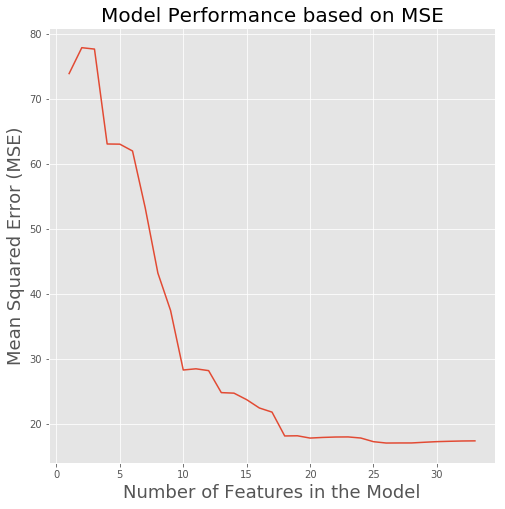

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.plot(x,a)
plt.title('Model Performance based on MSE',fontsize=20)
plt.xlabel('Number of Features in the Model',fontsize=18)
plt.ylabel('Mean Squared Error (MSE)',fontsize=18)
plt.show()

#### 26 features are gving minimum MSE, 17.69.

## 4.2 PCA on normalized data

#### 1. Code such a function and apply this to all explanatory variables in your data (but not to the target). This gives you a normalized data matrix Xn.

In [35]:
def normalize(dft):
    m = []
    s=[]
    for i in range(len(dft.columns.values)):
        m.append(np.mean(dft.iloc[:,i]))
        s.append(np.std(dft.iloc[:,i]))
        
        dft.iloc[:,i] = ((dft.iloc[:,i] - m[i] )/ s[i])
    return(dft)

#### 2. Repeat the analysis in 4.1 with normalized data.

In [36]:
dff1 = normalize(df.drop(['target'],axis=1))
dff1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,...,1.256242,0.963737,1.580424,3.241579,2.629820,2.518748,2.172072,2.245231,2.417190,-0.548638
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,...,1.676314,1.889915,-0.821213,-0.487747,-0.040972,0.530976,-0.012833,-0.836194,0.468356,-0.868733
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,...,1.555699,1.539392,0.952545,1.035398,1.343280,2.022645,0.912242,-0.372023,1.182516,-0.769754
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,...,-0.624514,-0.788593,3.299957,3.359667,1.894475,1.436106,2.812786,4.863883,0.299092,-0.080447
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,...,1.767814,1.807271,0.288991,0.527433,1.350796,1.412851,-0.023632,-0.534204,1.223507,-0.780212


In [37]:
mod1 = PCA()
mod1.fit(dff1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
mod1.explained_variance_

array([  1.07163507e+01,   5.14878549e+00,   2.37191766e+00,
         2.26810196e+00,   2.04482754e+00,   1.71177048e+00,
         1.27683221e+00,   1.07336004e+00,   9.94954490e-01,
         9.25556843e-01,   7.77768570e-01,   6.47534905e-01,
         5.10340249e-01,   4.69664493e-01,   3.64239059e-01,
         3.33393030e-01,   3.20151212e-01,   2.06802610e-01,
         1.81598126e-01,   1.62454051e-01,   1.24398301e-01,
         1.07861798e-01,   1.01013295e-01,   8.70203041e-02,
         6.89987935e-02,   3.41289318e-02,   1.68803068e-02,
         5.84268393e-03,   5.47199151e-03,   3.44999126e-03,
         2.06214749e-03,   1.69022584e-03,   1.24001508e-04])

In [39]:
mod1.explained_variance_ratio_

array([  3.24096127e-01,   1.55715455e-01,   7.17342448e-02,
         6.85945317e-02,   6.18420116e-02,   5.17693191e-02,
         3.86154190e-02,   3.24617812e-02,   3.00905508e-02,
         2.79917479e-02,   2.35221660e-02,   1.95834907e-02,
         1.54342931e-02,   1.42041304e-02,   1.10157339e-02,
         1.00828531e-02,   9.68237884e-03,   6.25436089e-03,
         5.49209808e-03,   4.91312108e-03,   3.76219559e-03,
         3.26207977e-03,   3.05495951e-03,   2.63176749e-03,
         2.08674037e-03,   1.03216616e-03,   5.10513531e-04,
         1.76701125e-04,   1.65490221e-04,   1.04338579e-04,
         6.23658213e-05,   5.11177417e-05,   3.75019532e-06])

In [40]:
(mod1.explained_variance_ratio_).cumsum()

array([ 0.32409613,  0.47981158,  0.55154583,  0.62014036,  0.68198237,
        0.73375169,  0.77236711,  0.80482889,  0.83491944,  0.86291119,
        0.88643335,  0.90601684,  0.92145114,  0.93565527,  0.946671  ,
        0.95675385,  0.96643623,  0.97269059,  0.97818269,  0.98309581,
        0.98685801,  0.99012009,  0.99317505,  0.99580682,  0.99789356,
        0.99892572,  0.99943624,  0.99961294,  0.99977843,  0.99988277,
        0.99994513,  0.99999625,  1.        ])

In [41]:
dataRot = mod1.fit_transform(dff1)
dataRot

array([[-3.77809885,  5.63161307,  1.54170481, ..., -0.04223375,
         0.04891803, -0.01489645],
       [-2.28245297,  0.76802547, -2.31470105, ...,  0.0925961 ,
         0.0334165 , -0.00947875],
       [-3.5255955 ,  3.10233376, -1.24116776, ...,  0.08603948,
         0.08731899, -0.01063162],
       ..., 
       [-1.49116054,  3.41093477, -4.1607916 , ...,  0.06495751,
         0.07297653, -0.01431947],
       [-1.38023212,  2.41648192,  5.20843855, ...,  0.04510362,
         0.07108861, -0.00638213],
       [-0.89560636,  1.74879067,  4.44426235, ...,  0.04285537,
         0.04606648, -0.01014296]])

In [42]:
dff = pd.DataFrame(data=dataRot)
a = []
c = []
x = []
for i in range(1,34):
    dfh = pd.DataFrame(data = dff.iloc[:,0:i])
    c.append(dfh.columns.values)
    a.append(mse_cv(dfh,df['target']))
    x.append(len(c))
    
    d = pd.DataFrame({'feature':c,'MSE':a})

print(d.loc[d['MSE'].idxmin()][1],d.loc[d['MSE'].idxmin()][0])
len(d.loc[d['MSE'].idxmin()][1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32] 17.3377317441


33

In [43]:
num.append(len(d.loc[d['MSE'].idxmin()][1]))
msev.append(d.loc[d['MSE'].idxmin()][0])

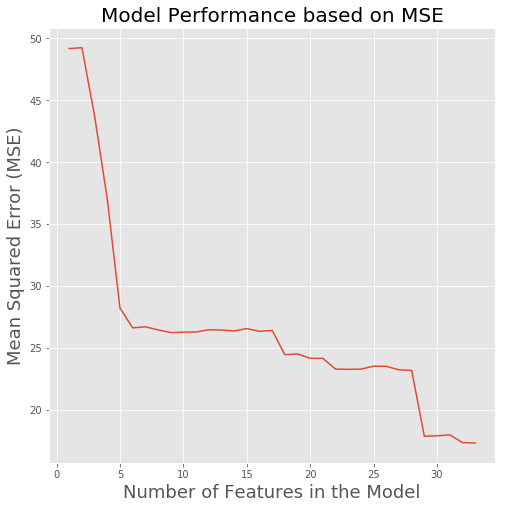

In [44]:
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.plot(x,a)
plt.title('Model Performance based on MSE',fontsize=20)
plt.xlabel('Number of Features in the Model',fontsize=18)
plt.ylabel('Mean Squared Error (MSE)',fontsize=18)
plt.show()

In [45]:
Xt = df.drop(['target'],axis=1)
Xt = np.append(np.ones((len(Xt),1)),Xt,axis=1)

np.linalg.cond(Xt.dot(Xt.T))

2.6237443006148761e+21

As we can see from the condition number above, which comes out to be very large, we can explain the incorrect behavior of these models by stating that there are highly correlated features in the model which lead to bad MSE values for lesser number of features.

## 4.3 What's the best solution?

#### Compare all your results: full model, forward selection, PCA on raw data, and PCA on normalized data. Which one is most precise? Which one is most compact? Which one is the easiest to do? Which one is the most straightforward to interpret?

In [46]:
c=['Full-Model','Fwd. Selection','PCA','Norm PCA']

In [47]:
ddd = pd.DataFrame({'Model Name':c,'Mean Squared Error Value':msev, 'Number of Features':num})
pd.DataFrame(data=ddd,columns=['Model Name','Mean Squared Error Value', 'Number of Features'])

,Model Name,Mean Squared Error Value,Number of Features
0,Full-Model,17.337732,33
1,Fwd. Selection,16.500881,19
2,PCA,17.004038,26
3,Norm PCA,17.337732,33


#### Which one is most precise?

Forward selection model looks the most precise as it has the minimum number of features and providing the least Mean squared error as well. However, raw PCA is performing well as and may provide precise results on test data.

#### Which one is most compact?

Forward selection model looks the most compact as it has the minimum number of features and providing the least Mean squared error as well. However, if we select the 5 or 6 features in the normalized PCA or around 10-11 features in the raw PCA model, then we will get smaller MSE values and number of features would also be very small. The reason we could do that is because we see good amount of collinearity (as indicated by the condition number) between the variables and hence selecting a model with fewer number of features would make more sense.

#### Which one is the easiest to do?
Full model is easiest to do as we don't have to do any additional feature selection procedures and would require the least amount of time for implementation. The mena squared error values are also not slightly varied from the best performing model(Fwd. Selection).

####  Which one is the most straightforward to interpret?
Full Model is most stratightforward to interpret as we know that all the features are being included and there would be certain amount of error involved as we are not checking for multicollinearity or other statistical analysis. However, if we are looking for better predictions then Fwd. Selection or PCA would make more sense.